<a href="https://colab.research.google.com/github/ArunK-ML/ML-Regression-Model---Concrete-Mix-Strength---Dataset/blob/main/Concrete_Strength_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/Concrete_Strength_clean.csv")
df

,Unnamed: 0,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),...,Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage
0,0,Crushed,Natural,1,0.0,43.0,365,0.52,225,0,...,160,2407,21.8,26.3,0,0,0.0,0,0,0
1,1,Crushed,Natural,1,0.0,35.0,365,0.52,225,0,...,160,2403,26.3,35.3,0,0,0.0,0,0,0
2,2,Crushed,Natural,2,45.6,38.0,350,0.53,185,type SP 801 dos 1 lit,...,120,2475,32.7,44.9,0,0,0.0,0,0,0
3,3,Natural,Natural,2,57.9,38.0,340,0.49,165,Sp 432 0.9 lit,...,190,2412,30.3,41.0,0,0,0.0,0,0,0
4,4,Natural,Natural,2,19.5,38.0,325,0.51,165,sp432 dos 1.0 lit,...,170,2404,27.0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2280,Natural,Natural,2,0.0,43.0,375,0.48,180,0,...,150,2404,24.8,0.0,Natural,Natural,32.8,0,0,0
2278,2281,Natural,Natural,2,0.0,43.0,375,0.45,170,0,...,175,2404,34.7,42.3,Natural,Natural,0.0,Type Rehobuild 850 * Dos. 0.75 lit,Type Rehobuild 850,Dos. 0.75 lit
2279,2282,Crushed,Natural,2,0.0,43.0,365,0.51,185,0,...,135,2454,35.4,42.5,Crushed,Natural,30.4,Type Sp(Fdn-5) * Dos 2.5,Type Sp(Fdn-5),Dos 2.5
2280,2283,Natural,Natural,2,0.0,43.0,385,0.47,180,0,...,95,2386,25.9,0.0,Natural,Natural,42.6,0,0,0


In [2]:
df.shape

(2282, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  2282 non-null   int64  
 1   Type_of_course_Aggregate                    2282 non-null   object 
 2   Type_of_Fine_Aggregate_                     2282 non-null   object 
 3   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 4   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 5   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 6   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 7   W/C_Ratio                                   2282 non-null   float64
 8   Water_Content_(Kg/m3)                       2282 non-null   int64  
 9   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 10  Total_Aggreg

In [4]:
df.drop(columns=["Unnamed: 0","Type_of_Coarse_Aggregate","Type_of_Fine_Aggregate"],inplace=True)

In [5]:
df["Target_Mean_Strength_(N/mm2)"].unique()

array([43. , 35. , 38. , 25. , 48. , 28. , 39. , 42. ,  0. , 43.1, 40.4,
       38.5])

In [7]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([1, 2, 0])

In [ ]:
df["Max._Size_of_Coarse_Aggregate_(mm)"] = df["Max._Size_of_Coarse_Aggregate_(mm)"].replace({"n":"0"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type_of_course_Aggregate                    2282 non-null   object 
 1   Type_of_Fine_Aggregate_                     2282 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 3   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 4   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 5   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 6   W/C_Ratio                                   2282 non-null   float64
 7   Water_Content_(Kg/m3)                       2282 non-null   int64  
 8   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 9   Total_Aggregate_(Kg/m3)                     2282 non-null   int64  
 10  Fine_Aggrega

In [9]:
df.duplicated().sum()

np.int64(1169)

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1884
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type_of_course_Aggregate                    1113 non-null   object 
 1   Type_of_Fine_Aggregate_                     1113 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)          1113 non-null   int64  
 3   Passing_0.6_mm_Sieve_(%)                    1113 non-null   float64
 4   Target_Mean_Strength_(N/mm2)                1113 non-null   float64
 5   Cement_O.P.C_(Kg/m3)                        1113 non-null   int64  
 6   W/C_Ratio                                   1113 non-null   float64
 7   Water_Content_(Kg/m3)                       1113 non-null   int64  
 8   Additive_Type_&_Dosage_(/100_kg_of_cement)  1113 non-null   object 
 9   Total_Aggregate_(Kg/m3)                     1113 non-null   int64  
 10  Fine_Aggregate_(K

In [14]:
df.shape

(1113, 20)

In [15]:
df["Type_of_course_Aggregate"].unique()

array(['Crushed', 'Natural'], dtype=object)

In [16]:
df["Type_of_Fine_Aggregate_"].unique()

array(['Natural', 'Crushed'], dtype=object)

In [20]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([40, 20,  0])

In [19]:
df['Max._Size_of_Coarse_Aggregate_(mm)'] = df['Max._Size_of_Coarse_Aggregate_(mm)'].replace({
    1 : 40,
    2 : 20,
    0 : 0
})

/tmp/ipython-input-627795874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max._Size_of_Coarse_Aggregate_(mm)'] = df['Max._Size_of_Coarse_Aggregate_(mm)'].replace({


In [ ]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)"].unique()

array(['0', 'type SP 801 dos 1 lit', 'Sp 432 0.9 lit ',
       'sp432 dos 1.0 lit', 'sikamentR2004 dos .8',
       'consplat RP 364 *dos .8', 'rheobuaile850 1.2 of cement by weight',
       'Type RHEOBUILD 850 * Dos. 1.25 lit', 'type dos 1 lit',
       'plastment rx-xr .8 lit', 'R2004 dos 1.65 lit',
       'type sikament 2004*dos. 1 lit', 'Type SP 432 * Dos. 1.0 lit',
       'Type kem Flow * Dos. 0.8 lit ',
       'Sikament - R2004 * Dos * 1.25 lit', 'X-MIXHPN DOS . 1.5 LIT',
       'x-mix HPN dos 1.5 lit', 'x-mix RPS dos .7 lit',
       'R2004 * Dos * 0.8 lit', 'Sikament - R 2004 1.0 lit ',
       'type euro 8600*dos. 1.0 lit', 'R2004 * Dos * 0.7 lit',
       'Tyoe SP - 337 * Dos. 1.0 lit', 'Type SP - 337 Dos. 1.0 lit',
       'sptjm R11 dos 1% of cement by weight',
       'sbtjm r-11- dos 1% of cement by weight',
       'Type RX * Dosage 0.75 lit', 'Euro PLAST 8600 Dos. *0.75 lit ',
       'Euro 8600 Dos. *1.0 lit ', 'Type RX * Dosage 0.5 lit',
       'Euro 8600 Dos. *0.5 lit ', 'Sik

In [ ]:
df['Max._Size_of_Coarse_Aggregate_(mm)'].astype("int")

,Max._Size_of_Coarse_Aggregate_(mm)
0,1
1,1
2,2
3,2
4,2
...,...
2281,2
2282,2
2283,2
2284,2


In [ ]:
df.to_csv("Concrete_Strength_clean")

# **Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = df[i].astype(str) # Convert to string before encoding
  df[i] = code.fit_transform(df[i])

# **Correlation testing**

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),Total_Aggregate_(Kg/m3),...,Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage
Type_of_course_Aggregate,1.000000,0.930737,-0.172187,0.837829,-0.643039,-0.467737,0.319567,-0.109312,0.533973,0.098259,...,-0.164329,0.014043,-0.307106,-0.079858,-0.827374,-0.926595,-0.196187,-0.600524,-0.614948,0.501059
Type_of_Fine_Aggregate_,0.930737,1.000000,-0.069923,0.873289,-0.685067,-0.461142,0.426744,0.012633,0.547560,0.135802,...,-0.199778,0.019661,-0.282654,-0.069625,-0.888322,-0.994852,-0.210639,-0.644761,-0.660247,0.537969
Max._Size_of_Coarse_Aggregate_(mm),-0.172187,-0.069923,1.000000,-0.066095,0.163033,0.208586,0.230135,0.339567,-0.012112,0.167472,...,0.168827,0.030361,0.133410,0.039574,-0.079704,0.085554,-0.010463,0.053845,0.055174,-0.025587
Passing_0.6_mm_Sieve_(%),0.837829,0.873289,-0.066095,1.000000,-0.596432,-0.404464,0.354068,0.001308,0.525431,0.102897,...,-0.163884,0.034563,-0.254292,-0.061413,-0.776020,-0.869083,-0.184010,-0.563250,-0.576779,0.469959
Target_Mean_Strength_(N/mm2),-0.643039,-0.685067,0.163033,-0.596432,1.000000,0.634676,-0.008296,0.255574,-0.364265,0.368162,...,0.256668,0.097172,0.317418,0.086215,0.641371,0.728196,0.157972,0.487619,0.497879,-0.412040
Cement_O.P.C_(Kg/m3),-0.467737,-0.461142,0.208586,-0.404464,0.634676,1.000000,0.029771,0.500241,-0.342829,0.367972,...,0.226542,0.120527,0.264652,0.045857,0.393616,0.511479,0.098769,0.282461,0.289046,-0.241454
W/C_Ratio,0.319567,0.426744,0.230135,0.354068,-0.008296,0.029771,1.000000,0.672700,0.145086,0.552644,...,-0.211244,0.143092,-0.076646,-0.022608,-0.461803,-0.386305,-0.083338,-0.308470,-0.319944,0.300284
Water_Content_(Kg/m3),-0.109312,0.012633,0.339567,0.001308,0.255574,0.500241,0.672700,1.000000,-0.175301,0.382385,...,-0.088386,0.123716,0.047258,-0.005257,-0.152103,0.024395,-0.001732,-0.095240,-0.100774,0.098953
Additive_Type_&_Dosage_(/100_kg_of_cement),0.533973,0.547560,-0.012112,0.525431,-0.364265,-0.342829,0.145086,-0.175301,1.000000,0.124669,...,0.100038,-0.011786,-0.021857,0.006132,-0.485411,-0.543623,-0.115101,-0.352320,-0.360783,0.293965
Total_Aggregate_(Kg/m3),0.098259,0.135802,0.167472,0.102897,0.368162,0.367972,0.552644,0.382385,0.124669,1.000000,...,0.123106,0.192936,0.201155,0.026085,-0.097094,-0.061235,-0.016893,0.021146,0.022107,-0.013069


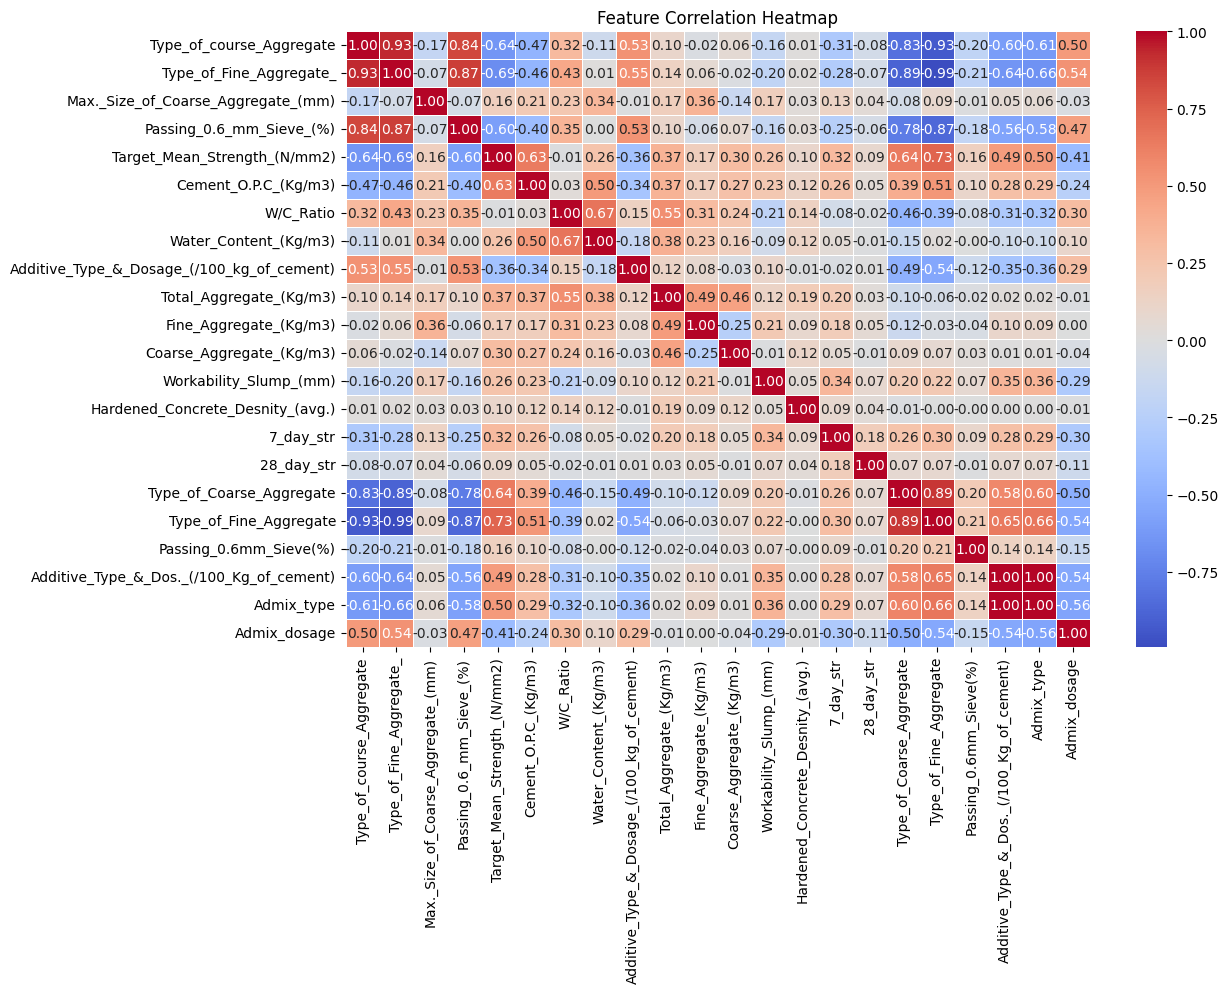

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# **Hypothesis testing**

In [ ]:
df.columns

Index(['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_',
       'Max._Size_of_Coarse_Aggregate_(mm)', 'Passing_0.6_mm_Sieve_(%)',
       'Target_Mean_Strength_(N/mm2)', 'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio',
       'Water_Content_(Kg/m3)', 'Additive_Type_&_Dosage_(/100_kg_of_cement)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Type_of_Coarse_Aggregate', 'Type_of_Fine_Aggregate',
       'Passing_0.6mm_Sieve(%)', 'Additive_Type_&_Dos._(/100_Kg_of_cement)',
       'Admix_type', 'Admix_dosage'],
      dtype='object')

In [ ]:
continous = [
       'Passing_0.6_mm_Sieve_(%)',
       'Target_Mean_Strength_(N/mm2)','W/C_Ratio',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Passing_0.6mm_Sieve(%)'
       ]


catergory = [
    'Type_of_Fine_Aggregate_', 'Type_of_Coarse_Aggregate','Max._Size_of_Coarse_Aggregate_(mm)',
    'Cement_O.P.C_(Kg/m3)','Water_Content_(Kg/m3)','Additive_Type_&_Dosage_(/100_kg_of_cement)',
    'Type_of_Coarse_Aggregate', 'Type_of_Fine_Aggregate','Additive_Type_&_Dos._(/100_Kg_of_cement)',
       'Admix_type', 'Admix_dosage'
]

In [ ]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [ ]:

#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False


In [ ]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [ ]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else: # Add an else condition to handle cases not covered by the above conditions
          result = False # Or assign a default value based on your logic
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [ ]:
final_df = pd.DataFrame(final)
final_df

In [ ]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
df.drop(columns=['Type_of_course_Aggregate'], inplace=True)

In [ ]:
df

# **Train the model ML**

In [ ]:
df.columns

In [ ]:
y = df['28_day_str']
x = df.drop("28_day_str",axis=1)

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))